In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.signal import convolve
import scipy
from joblib import Parallel, delayed
import time
from scipy import sparse
from tqdm import tqdm, tqdm_notebook

%run ../Scripts/immunity.py
%run ../Scripts/initMethods.py

In [24]:
params = { #parameters relevant for the equations
    "Nh":           10000,
    "N0":           10000,
    "M":                1, #Also L, total number of spacers
    }
sim_params = { #parameters relevant for the simulation (including Inital Valuess)
    "xdomain":                    100,
    "dx":                           1,
    "initial_mean_n":           [0,-40],
    "initial_var_n":               10,
    "initial_mean_nh":         [0,40],
    "initial_var_nh":              10,
    "num_threads":                  4,
    "tail_axis":               [1, 1],
    }

In [25]:
nh = init_guassian(params["Nh"], sim_params, "nh")

n = init_guassian(params["N0"], sim_params, "n")

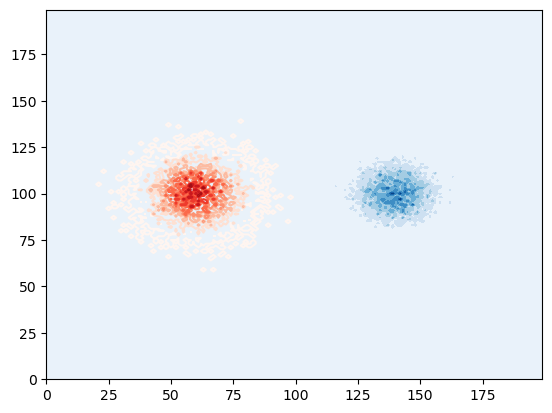

In [26]:
plt.contour(nh.todense(), cmap="Reds")
plt.contourf(n.todense(), cmap="Blues")
plt.show()

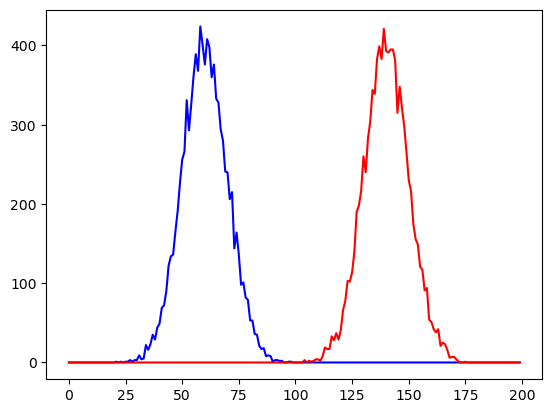

In [27]:
flat_nh = np.array(np.sum(nh.todense(), axis = 0)).squeeze()
flat_n = np.array(np.sum(n.todense(), axis = 0)).squeeze()
plt.plot(flat_nh, color = "blue")
plt.plot(flat_n, color = "red")

In [28]:
old_ratio = np.sum(flat_n)/np.sum(flat_nh)
old_ratio

1.0

In [29]:
nh_new = immunity_update(nh, n, params, sim_params)

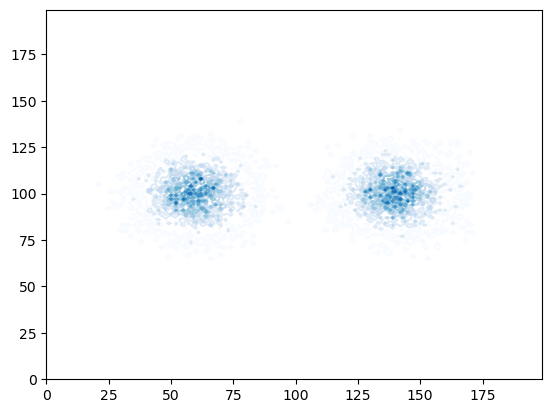

In [30]:
plt.contour(nh_new.todense(), cmap = "Blues")

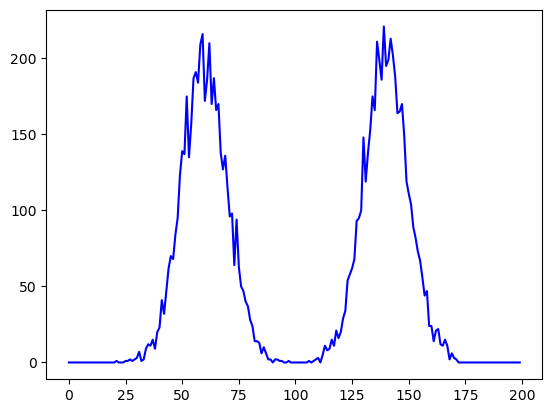

In [31]:
flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
plt.plot(flat_nh_new, color = "blue")

In [32]:
np.sum(flat_nh_new)

10000

In [33]:
new_ratio = np.sum(flat_nh_new[100:-1])/np.sum(flat_nh_new[0:100])
new_ratio

1.0145044319097503

In [34]:
loss = np.sum(flat_nh_new[0:100])/np.sum(flat_nh)
gain = np.sum(flat_nh_new[100:-1])/np.sum(flat_n)
print("rate of loss:", loss)
print("rate of gain:", gain)

rate of loss: 0.4964
rate of gain: 0.5036
